# Module 2- Plotting in Financial Markets



   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. 
> Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock.
 
> This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from functools import partial
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv("week2.csv")#loading week2.csv file
del df['Unnamed: 0']
duplicate_df = df 
df.head(5)#loading first few lines of week2.csv file

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,VWAP,Month,Year,Day_Perc_Change,Trend
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,509.450000,5,2017,0.000000,Slight or No change
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,510.249582,5,2017,0.003631,Slight or No change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,508.495948,5,2017,-0.009681,Slight or No change
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,500.779579,5,2017,-0.026563,Slight or No change
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,500.222798,5,2017,0.009333,Slight or No change


In [2]:
df.Date.dtype 

dtype('O')

In [3]:
# Since datatype of Date is not 'datetime64 [ns]'
df['Date'] = pd.to_datetime(df['Date'])
df.Date.dtype 
#datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the endian-ness of the machine

dtype('<M8[ns]')

In [4]:
df = df.set_index(df['Date'])
df.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,VWAP,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,509.450000,5,2017,0.000000,Slight or No change
2017-05-16,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,510.249582,5,2017,0.003631,Slight or No change
2017-05-17,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,508.495948,5,2017,-0.009681,Slight or No change
2017-05-18,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,500.779579,5,2017,-0.026563,Slight or No change
2017-05-19,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,500.222798,5,2017,0.009333,Slight or No change


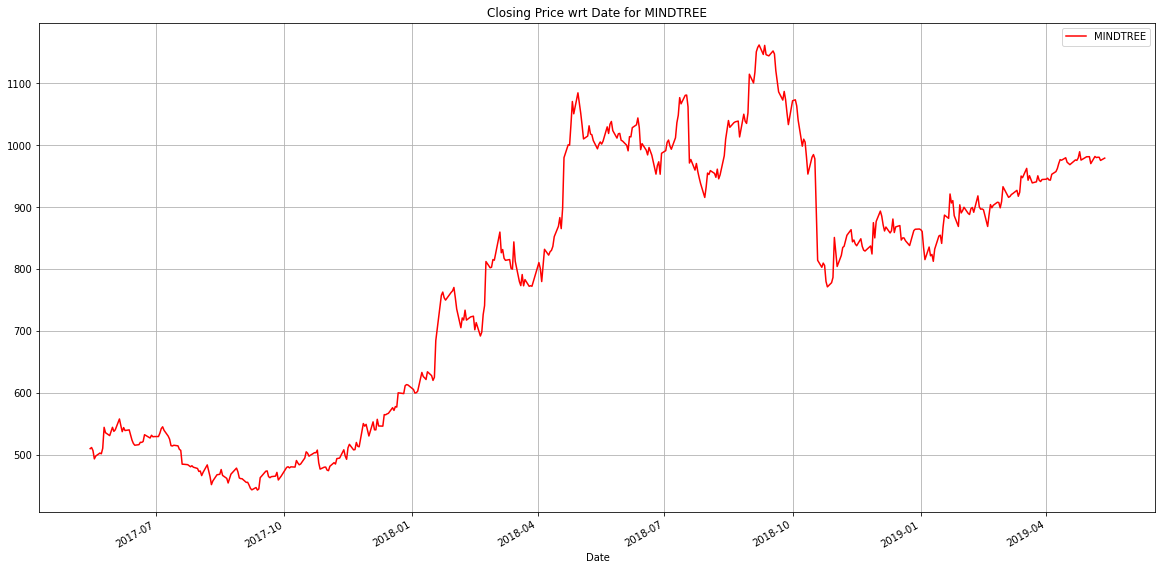

In [5]:
df['Close Price'].plot(label = 'MINDTREE', title = 'Closing Price wrt Date for MINDTREE', figsize = (20, 10), color = 'r')
plt.legend()
plt.grid()
plt.show()

In [6]:
# to look for drastic changes we will find the absolute difference between consecutive closing prices 
changes = df['Close Price'].diff().abs().sort_values(ascending = False)
changes.to_csv('Darsctic Changes in Closing Price.csv')

In [7]:
# we will take the top 5 Drastic change data, and scrap the news from monry control using BeautifulSoup
#Date
# 2018-10-19    164.05
# 2018-07-19     90.65
# 2018-04-20     82.25
# 2018-02-23     71.20
# 2018-10-31     64.70
# news for 2018-10-31 not available
# so we will scrap for rest 4 days 

In [8]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19)
soup = BeautifulSoup(r.content, 'html.parser')
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')

print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print('\n')
print('\n')
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print('-'*100)

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19)
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print('-'*100)

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20)
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print('-'*100)

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control




News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which

### Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


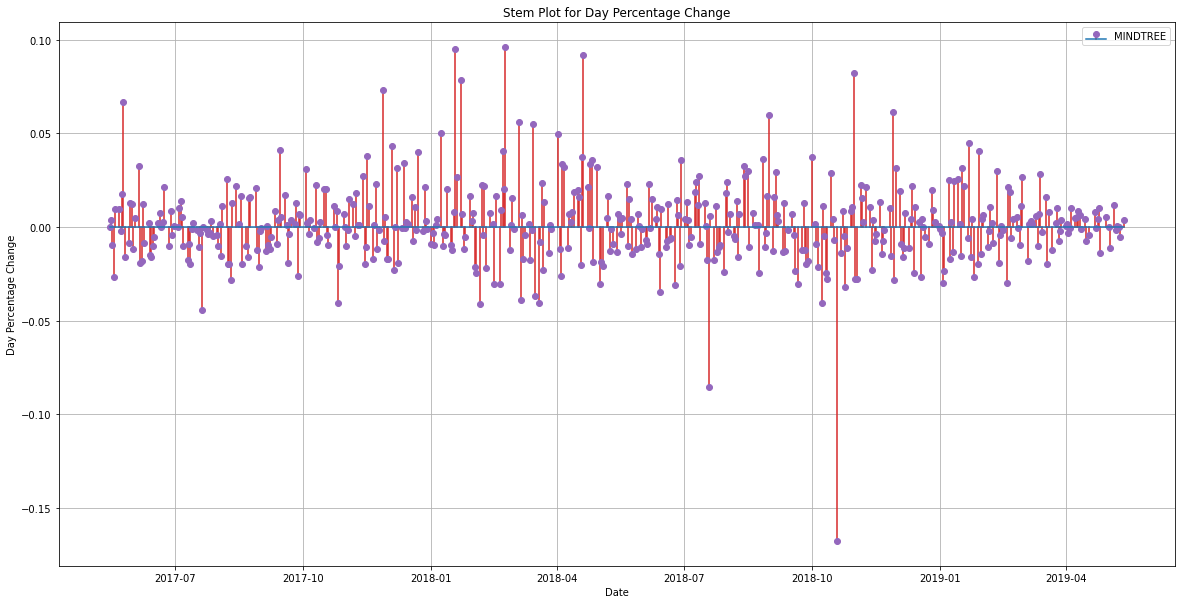

In [9]:
plt.figure(figsize = (20, 10))
plt.stem(df['Date'], df['Day_Perc_Change'], label = 'MINDTREE', basefmt = 'C0-', linefmt = 'C3-', markerfmt = 'C4o')
plt.title('Stem Plot for Day Percentage Change')
plt.xlabel('Date')
plt.ylabel('Day Percentage Change')
plt.grid()
plt.legend()

### Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
No handles with labels found to put in legend.


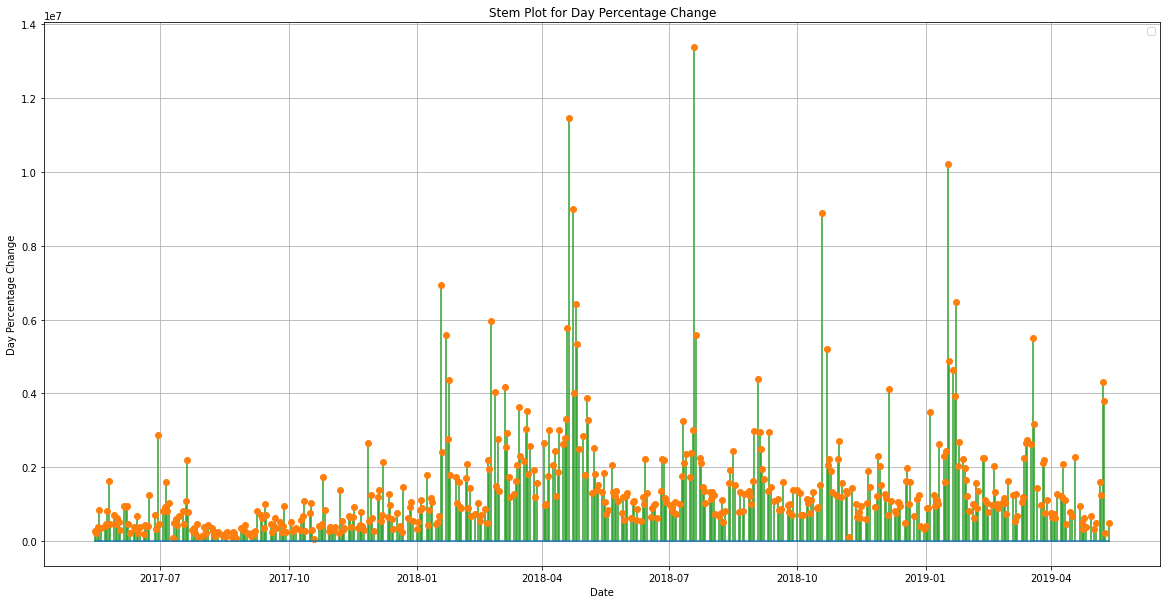

In [10]:
plt.figure(figsize=(20,10))
plt.stem(df.Date,df['Total Traded Quantity'], basefmt = 'C0-', linefmt = 'C2-', markerfmt = 'C1o')
plt.title('Stem Plot for Day Percentage Change')
plt.xlabel('Date')
plt.ylabel('Day Percentage Change')
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


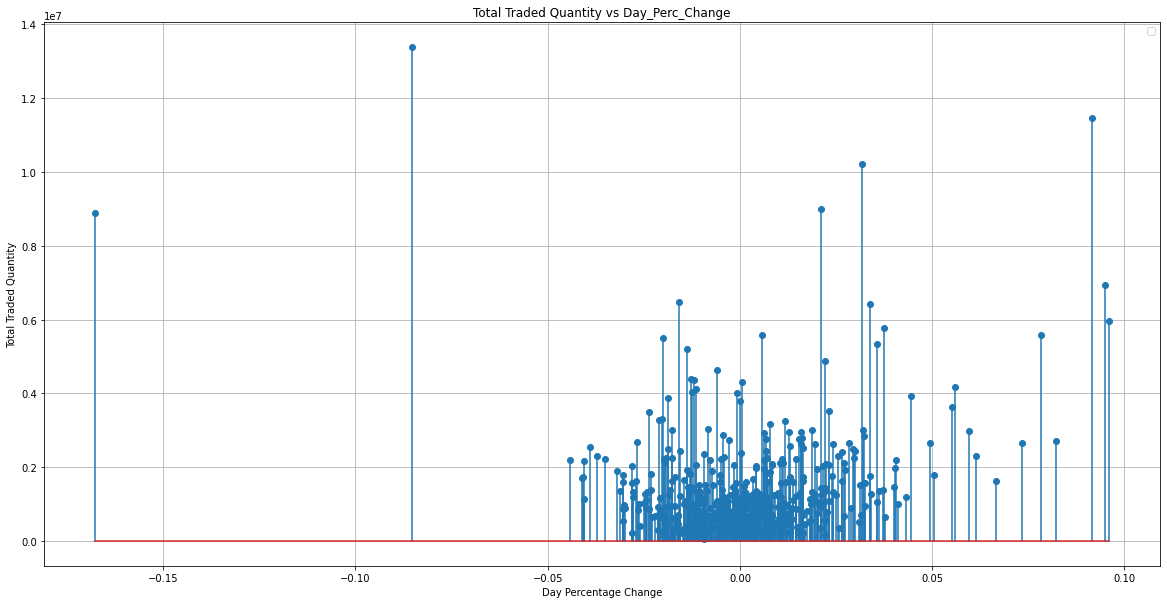

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
No handles with labels found to put in legend.


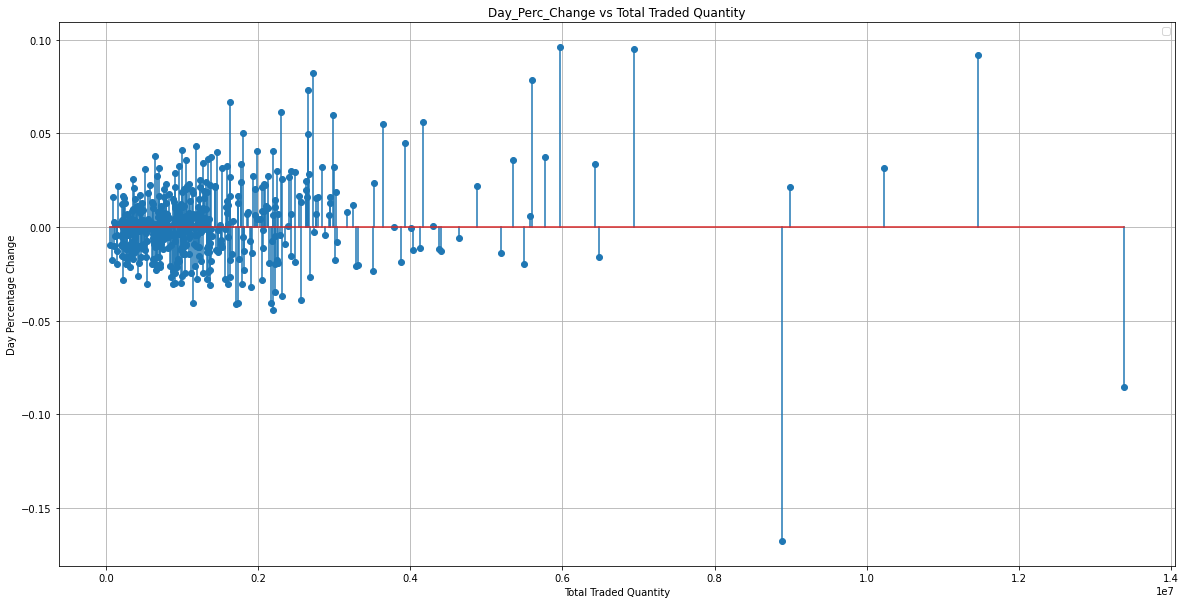

In [11]:
# Plotting them together one vs other 
plt.figure(figsize=(20,10))
plt.stem(df['Day_Perc_Change'],df['Total Traded Quantity'])
plt.title('Total Traded Quantity vs Day_Perc_Change')
plt.ylabel('Total Traded Quantity')
plt.xlabel('Day Percentage Change')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(20,10))
plt.stem(df['Total Traded Quantity'], df['Day_Perc_Change'])
plt.title('Day_Perc_Change vs Total Traded Quantity')
plt.xlabel('Total Traded Quantity')
plt.ylabel('Day Percentage Change')
plt.legend()
plt.grid()
plt.show()

*Documentation*:-

**Analysis**: The positive hills of Day_Perc_Change vs Date plot matches slightly with the Total Traded Quantity vs Date plot.

**Inference**: It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.
And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

### Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [12]:
from collections import Counter

trends = df['Trend'].unique()
counts = Counter(df.Trend.tolist())
print(trends)
print(counts)

['Slight or No change']
Counter({'Slight or No change': 494})


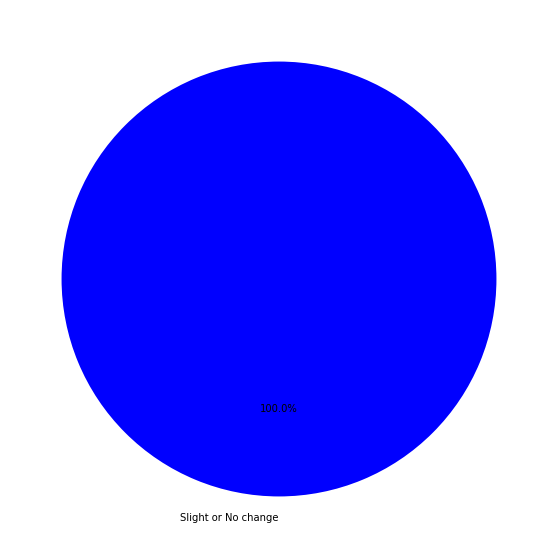

In [13]:
# We can see that we have only one trend for all columns i.e. Slight or No change 
# Pie chart for trend 
trend = ['Slight or No change']
count = [494]
color = ['b']
plt.figure(figsize = (10, 10))
plt.pie(count, labels = trend, colors = color, startangle = 90, autopct = '%.1f%%')
plt.show()

In [14]:
# We will find the average of each trend type
# here we only have 1 trend which is Slight or No change hence only 1 bar graph
volume_grouptrend = df.groupby(df.Trend)['Total Traded Quantity']
print('Description for Total Traded Quantity grouped by Trend')
volume_grouptrend.describe()

Description for Total Traded Quantity grouped by Trend


,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,1.388615e+06,1.450169e+06,46300.0,572476.25,1006586.5,1631997.25,13385207.0


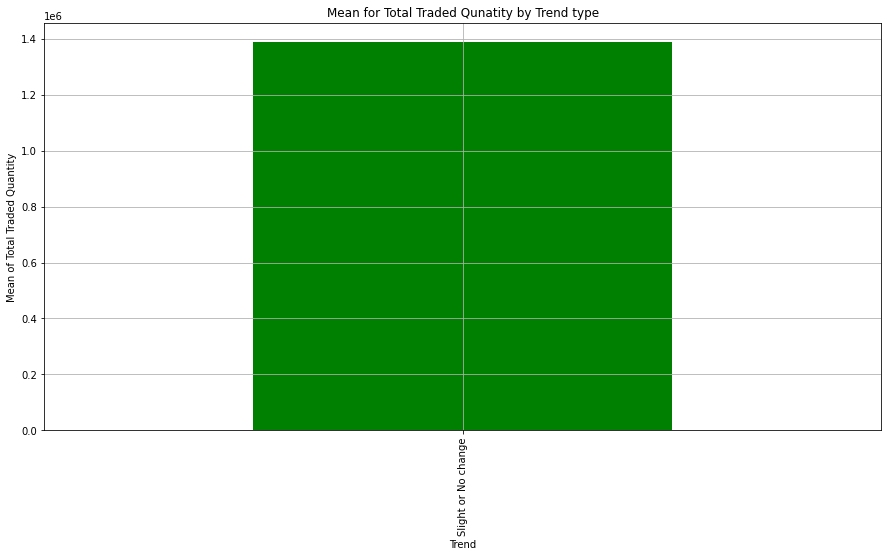

In [15]:
# since we have only one trend so we have only one bar in the bar plot for mean of Total Traded Quantity
plt.figure(figsize = (15, 7.5))
volume_grouptrend.mean().plot.bar(color = 'g')
plt.ylabel('Mean of Total Traded Quantity')
plt.title('Mean for Total Traded Qunatity by Trend type')
plt.grid()
plt.show()

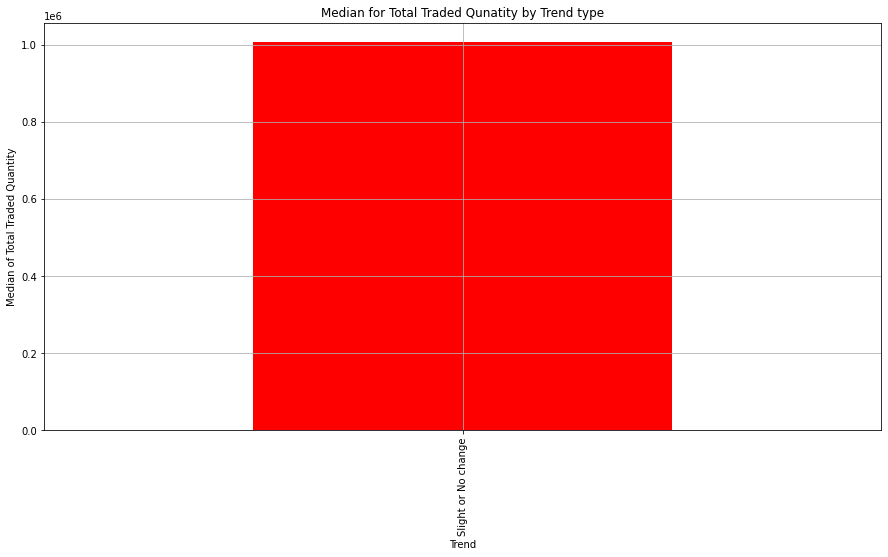

In [16]:
# since we have only one trend so we have only one bar in the bar plot for median of Total Traded Quantity
plt.figure(figsize = (15, 7.5))
volume_grouptrend.median().plot.bar(color = 'r')
plt.ylabel('Median of Total Traded Quantity')
plt.title('Median for Total Traded Qunatity by Trend type')
plt.grid()
plt.show()

### Query 2.5
Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

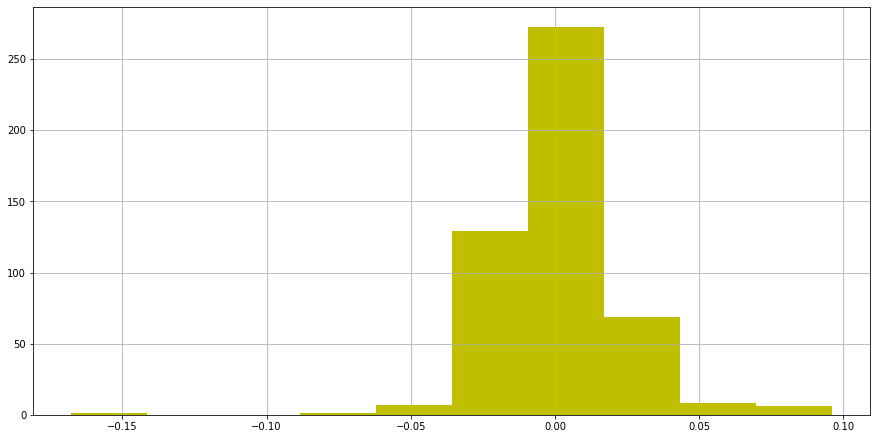

In [17]:
plt.figure(figsize = (15, 7.5))
plt.hist(df['Day_Perc_Change'], color = 'y')
plt.grid()
plt.show()

### Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe. Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [18]:
df_airtel1 = pd.read_csv('airtel_stock_data.csv')
df_cub1 = pd.read_csv('cub_stock_data.csv')
df_itc1 = pd.read_csv('itc_stock_data.csv')
df_tcs1 = pd.read_csv('tcs_stock_data.csv')
df_wipro1 = pd.read_csv('wipro_stock_data.csv')

In [19]:
df_airtel = df_airtel1[df_airtel1.Series == 'EQ']
df_cub = df_cub1[df_cub1.Series == 'EQ']
df_itc = df_itc1[df_itc1.Series == 'EQ']
df_tcs = df_tcs1[df_tcs1.Series == 'EQ']
df_wipro = df_wipro1[df_wipro1.Series == 'EQ']

In [20]:
df_airtel.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99


In [21]:
df_cub.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.8,180.1,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.4,182.2,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.0,184.8,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.1,183.0,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.3,182.5,183.05,183.39,313207,5.743804e+07,3905,244864,78.18


In [22]:
df_itc.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.3,338.75,331.30,337.1,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.0,338.20,333.05,334.5,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.0,367.70,331.00,333.0,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.0,335.05,330.00,330.2,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.4,333.60,327.40,329.8,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77


In [23]:
df_tcs.head(5)
df_tcs.Date = pd.to_datetime(df_tcs['Date'])
df_tcs.set_index('Date', inplace = True)

In [24]:
df_tcs.head(5)


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,TCS,EQ,2356.00,2359.0,2361.90,2340.1,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
2017-07-07,TCS,EQ,2347.55,2350.0,2356.45,2325.5,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2017-07-10,TCS,EQ,2331.95,2341.0,2444.90,2341.0,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
2017-07-11,TCS,EQ,2434.95,2426.0,2514.80,2426.0,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
2017-07-12,TCS,EQ,2475.80,2482.5,2483.30,2430.1,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00


In [25]:
df_wipro.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.8,260.05,255.85,256.5,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.1,258.25,255.00,257.1,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.0,268.95,257.00,268.5,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.2,273.50,262.10,264.0,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.7,265.80,261.30,263.4,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46


Single dataframe for closing price for all the companies 


In [26]:
import pandas as pd

columns = ['Airtel', 'CUB', 'ITC', 'TCS', 'Wipro']
df_closing = pd.DataFrame(columns = columns)

df_closing['Airtel'] = df_airtel['Close Price']
df_closing['CUB'] = df_cub['Close Price']
df_closing['ITC'] = df_itc['Close Price']
df_closing['TCS'] = df_tcs['Close Price']
df_closing['Wipro'] = df_wipro['Close Price']

df_closing.head(5)

,Airtel,CUB,ITC,TCS,Wipro
0,381.30,180.00,337.10,NaN,257.75
1,385.90,181.55,334.30,NaN,257.70
2,405.70,184.80,333.30,NaN,268.25
3,395.45,183.50,330.40,NaN,263.20
4,397.10,183.05,328.85,NaN,263.80


Single dataframe for percentage change in price for all the companies

In [27]:
df_perc_change = df_closing.pct_change().fillna(0)
df_closing.dropna()
df_perc_change.head(5)
df_perc_change.head(5)


,Airtel,CUB,ITC,TCS,Wipro
0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.012064,0.008611,-0.008306,0.0,-0.000194
2,0.051309,0.017901,-0.002991,0.0,0.040939
3,-0.025265,-0.007035,-0.008701,0.0,-0.018826
4,0.004172,-0.002452,-0.004691,0.0,0.002280


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


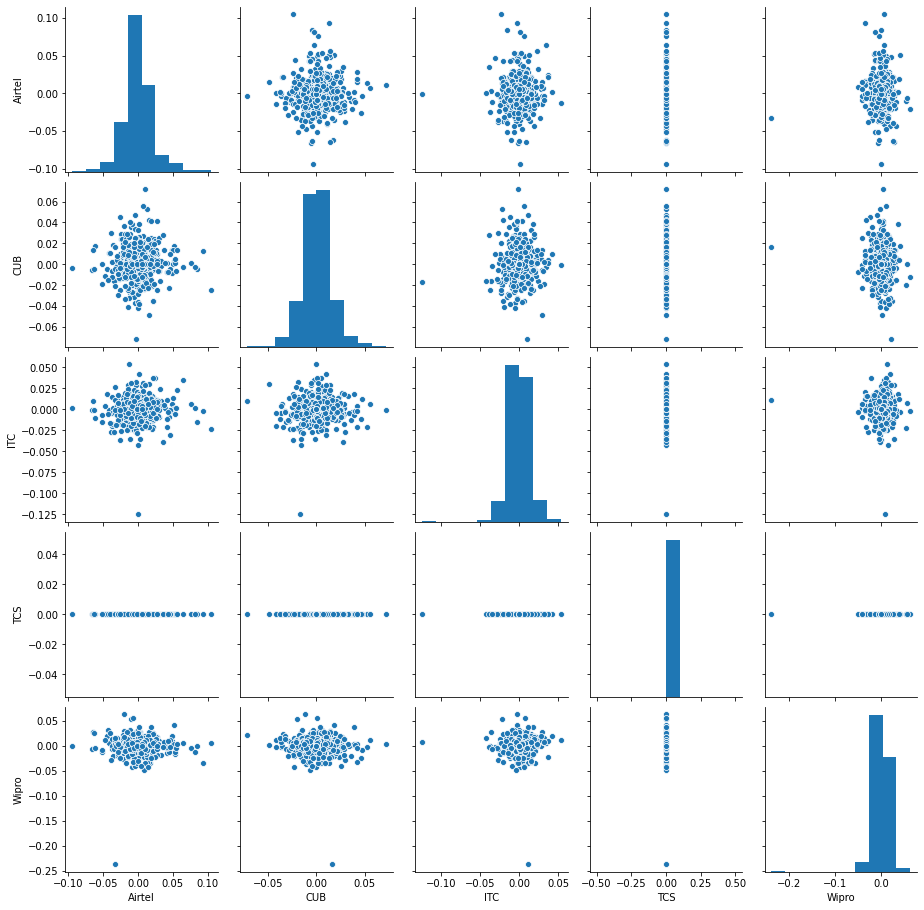

In [28]:
import seaborn as sns 

sns.pairplot(df_perc_change)

### Query 1.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values. Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [29]:
rolling_avg_airtel = df_perc_change['Airtel'].rolling(7).mean()
rolling_avg_airtel

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
493    0.000017
494    0.004054
495    0.003352
496    0.005766
497    0.007823
Name: Airtel, Length: 495, dtype: float64

In [30]:
std_dev_airtel = rolling_avg_airtel.fillna(0).std()
std_dev_airtel

0.008090752533380305

<function matplotlib.pyplot.show>

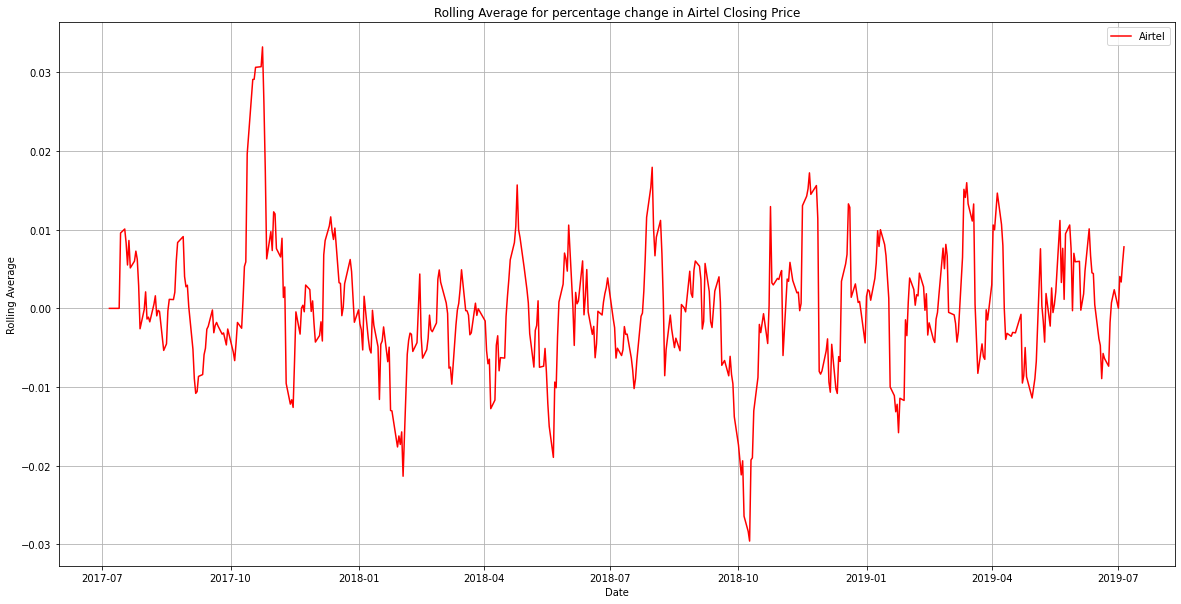

In [31]:
# plotting rolling avg for airtel
date = pd.to_datetime(df_airtel['Date'])
date = date.tolist()
plt.figure(figsize = (20, 10))
plt.plot(date, rolling_avg_airtel.fillna(0).tolist(), color = 'r', label = 'Airtel')
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.title('Rolling Average for percentage change in Airtel Closing Price')
plt.legend()
plt.grid()
plt.show

### Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [32]:
df_nifty = pd.read_csv('NIFTY50_Data.csv')
df_nifty.head(5)

,Date,Open,High,Low,Close
0,05 Jul 2019,11964.75,11981.75,11797.90,11811.15
1,04 Jul 2019,11928.80,11969.25,11923.65,11946.75
2,03 Jul 2019,11932.15,11945.20,11887.05,11916.75
3,02 Jul 2019,11890.30,11917.45,11814.70,11910.30
4,01 Jul 2019,11839.90,11884.65,11830.80,11865.60


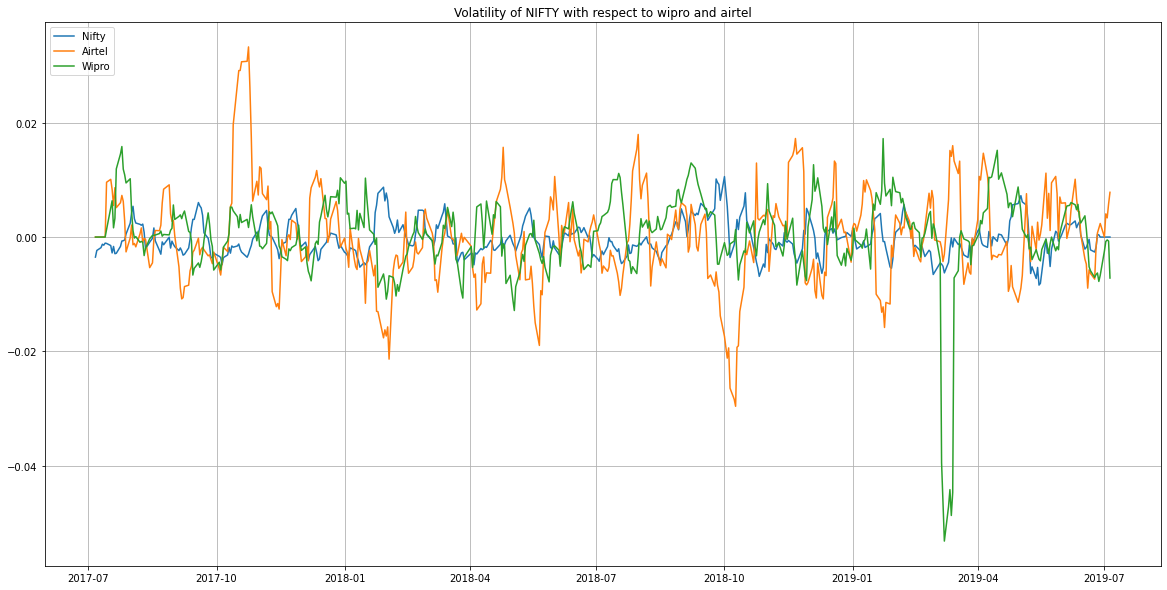

In [33]:
nifty_change = df_nifty['Close'].pct_change().fillna(0).rolling(7).mean().fillna(0)
nifty_Date = pd.to_datetime(df_nifty['Date']).tolist()
plt.figure(figsize=(20,10))

wipro_Date = pd.to_datetime(df_wipro['Date']).tolist()
wipro_change = df_wipro['Close Price'].pct_change().fillna(0).rolling(7).mean().fillna(0)

plt.title("Volatility of NIFTY with respect to wipro and airtel")
plt.plot(nifty_Date, nifty_change.tolist(), label = 'Nifty')
plt.plot(date, rolling_avg_airtel.fillna(0).tolist(), label = 'Airtel')
plt.plot(wipro_Date, wipro_change, label = 'Wipro')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

**If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, if the long-term average is above a shorter-term average then a downtrend might be the expected outcome.**

**Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. Reinforced by high trading volumes, this can signal further gains are in store.**

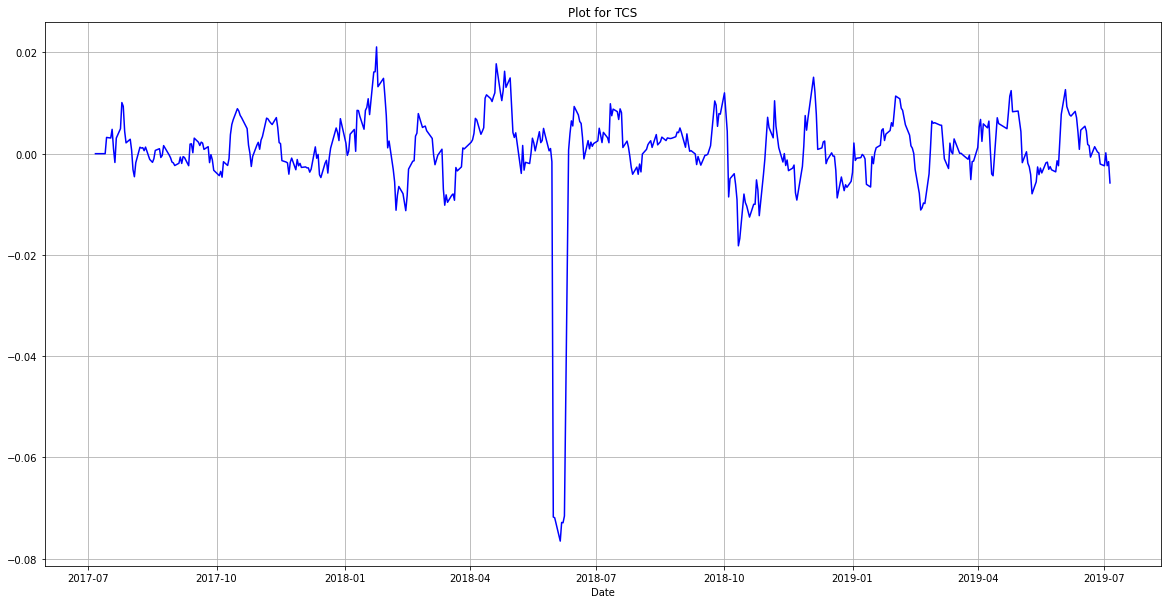

In [34]:
# for SMA purpose of buy and sell we will use TCS data
plt.figure(figsize = (20, 10))
tcs_Date = pd.to_datetime(df_tcs.index).tolist()
tcs_change = df_tcs['Close Price'].pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.plot(tcs_Date, tcs_change, color = 'b', label = 'TCS')
plt.xlabel('Date')
plt.title('Plot for TCS')
plt.grid()
plt.show()

In [35]:
# short and long signals 
short_window = 21
long_window = 34

df_signal = pd.DataFrame(index = tcs_Date)
df_signal['signal'] = 0.0

#SMA of Short Window
df_signal['short_SMA'] = df_tcs['Close Price'].rolling(window = short_window, min_periods = 1,center = False).mean().tolist()

#SMA of Long Window
df_signal['long_SMA'] = df_tcs['Close Price'].rolling(window = long_window, min_periods = 1, center = False).mean().tolist()

# updating signals 
df_signal['signal'] = np.where(df_signal['short_SMA'] > df_signal['long_SMA'], 1.0, 0.0)

# finding signal change position for trade orderes
df_signal['Positions'] = df_signal['signal'].diff().fillna(0)

df_signal.head(25)

,signal,short_SMA,long_SMA,Positions
2017-07-06,0.0,2347.550000,2347.550000,0.0
2017-07-07,0.0,2339.750000,2339.750000,0.0
2017-07-10,0.0,2371.483333,2371.483333,0.0
2017-07-11,0.0,2397.562500,2397.562500,0.0
2017-07-12,0.0,2405.940000,2405.940000,0.0
2017-07-13,0.0,2412.683333,2412.683333,0.0
2017-07-14,0.0,2410.507143,2410.507143,0.0
2017-07-17,0.0,2408.625000,2408.625000,0.0
2017-07-18,0.0,2408.594444,2408.594444,0.0
2017-07-19,0.0,2412.695000,2412.695000,0.0


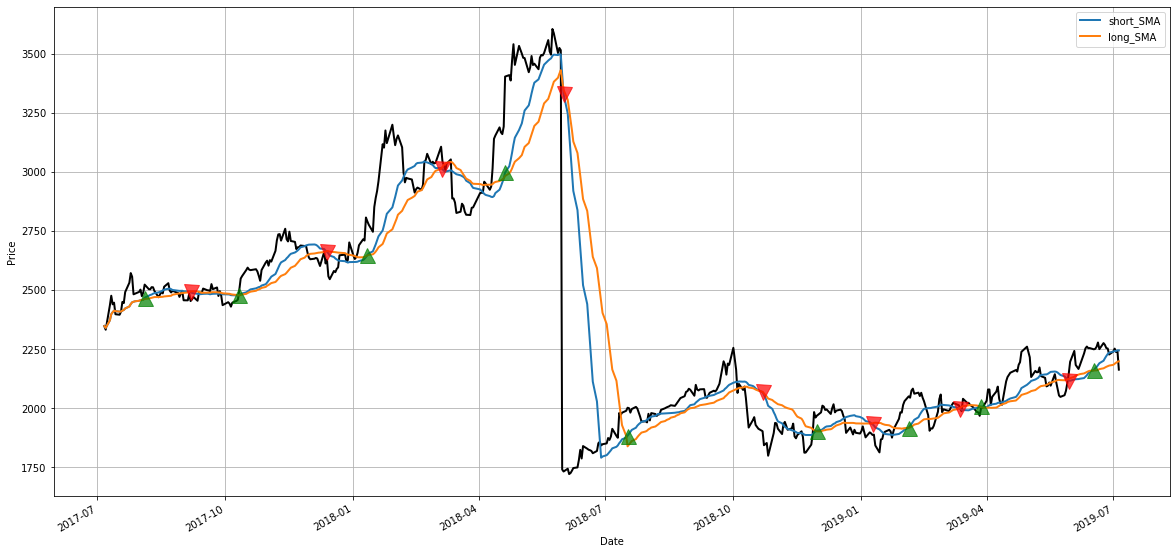

In [36]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,10))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
df_tcs['Close Price'].plot(ax=ax1, color='k', lw=2.)

#plot the short and long moving averages
df_signal[['short_SMA', 'long_SMA']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(df_signal.loc[df_signal.Positions == 1.0].index, df_signal.short_SMA[df_signal.Positions == 1.0], '^' , markersize = 15, color = 'g', alpha = 0.7)

#Plot the sell signals
ax1.plot(df_signal.loc[df_signal.Positions == -1.0].index, df_signal.short_SMA[df_signal.Positions == -1.0], 'v' , markersize = 15, color = 'r', alpha = 0.7)
ax1.grid()
plt.show()

### Query 2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 


*   The 14 day rolling mean of the closing price (we call it the average)
*   Upper band which is the rolling mean + 2 standard deviations away from the average.
*   Lower band which is the rolling mean - 2 standard deviations away from the average.
*   Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

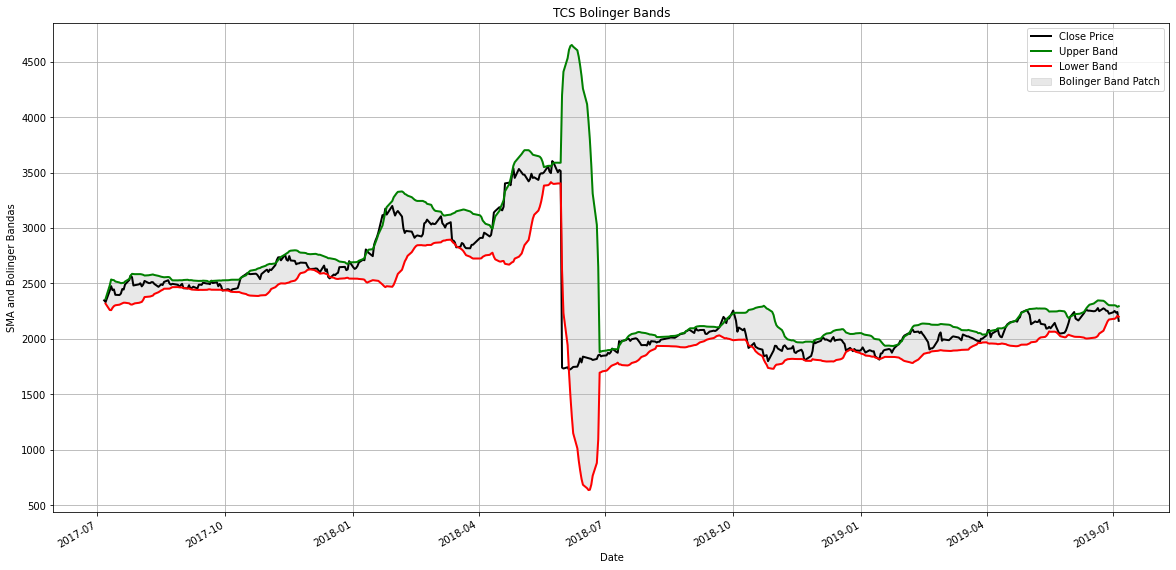

In [37]:
# Using the TCS Data 
window = 20

# Calculate SMA taking 20 day window 
sma = df_tcs['Close Price'].rolling(window = window, min_periods = 1, center = False).mean()

# Calculate standard deviaton taking 20 day window 
std = df_tcs['Close Price'].rolling(window = window, min_periods = 1, center = False).std()

upper_band = sma + 2 * std
lower_band = sma - 2 * std

ax = plt.figure(figsize = (20, 10)) 
ax = df_tcs['Close Price'].plot(lw = 2, color = 'k', label = 'Close Price')
ax = upper_band.plot(lw = 2, color = 'g', label = 'Upper Band')
ax = lower_band.plot(lw = 2, color = 'r', label = 'Lower Band')
ax.fill_between(df_tcs.index, upper_band, lower_band, color = 'k', alpha = 0.09, label = 'Bolinger Band Patch')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and Bolinger Bandas')
ax.legend()
ax.grid()
ax.set_title('TCS Bolinger Bands')
plt.show()